In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv('../train.csv', index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Read the description of the file
with open('../data_description.txt',  'r') as fi:
    print(fi.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Notes on the feature columns: 
The following columns have NA, but NA here indicate something: 
* Alley column     => NA means "No alley access". 
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtFinSF1 columns  => NA means "No Basement"
* FireplaceQu column  => NA means "No fireplace"
* GarageType, GarageCond, GarageFinish columns => NA means "No Garage"
* PoolQC column  => No Pool
* Fence column => No fence
* MiscFeature column => None

So be carful with dropping NA values. Next cell, I will fillna as if I didn't pandas will ignore NA values.

In [5]:
data.Alley = data.Alley.fillna(value = 'NoAlley')
data.BsmtCond = data.BsmtCond.fillna(value = 'NoBsmt')
data.BsmtQual = data.BsmtQual.fillna(value = 'NoBsmt')
data.BsmtExposure = data.BsmtExposure.fillna(value= 'NoBsmt')
data.BsmtFinType1 = data.BsmtFinType1.fillna(value= 'NoBsmt')
data.BsmtFinType2 = data.BsmtFinType2.fillna(value= 'NoBsmt')
data.LotFrontage = data.LotFrontage.fillna(value = 0)
data.FireplaceQu = data.FireplaceQu.fillna(value = 'Nofireplace')
data.GarageType = data.GarageType.fillna(value = 'NoGarage')
data.GarageCond = data.GarageCond.fillna(value = 'NoGarage')
data.GarageFinish = data.GarageFinish.fillna(value = 'NoGarage')
data.GarageYrBlt = data.GarageYrBlt.fillna(value = 0)           
data.GarageQual = data.GarageQual.fillna(value = 'NoGarage')

data.PoolQC = data.PoolQC.fillna(value = 'NoPool')
data.Fence = data.Fence.fillna(value = 'NoFence')
data.MiscFeature = data.MiscFeature.fillna(value = 'NoMisc')
data.MasVnrType = data.MasVnrType.fillna(value = 'noMas')
data.MasVnrArea = data.MasVnrArea.fillna(value = 'noMas')

data.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

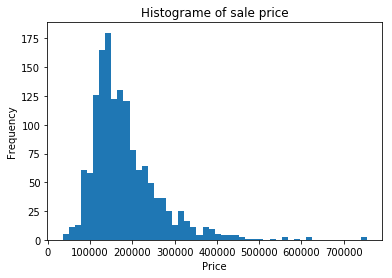

In [16]:
plt.hist(data.SalePrice, bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histograme of sale price');

## EDA for Numerical Columns:

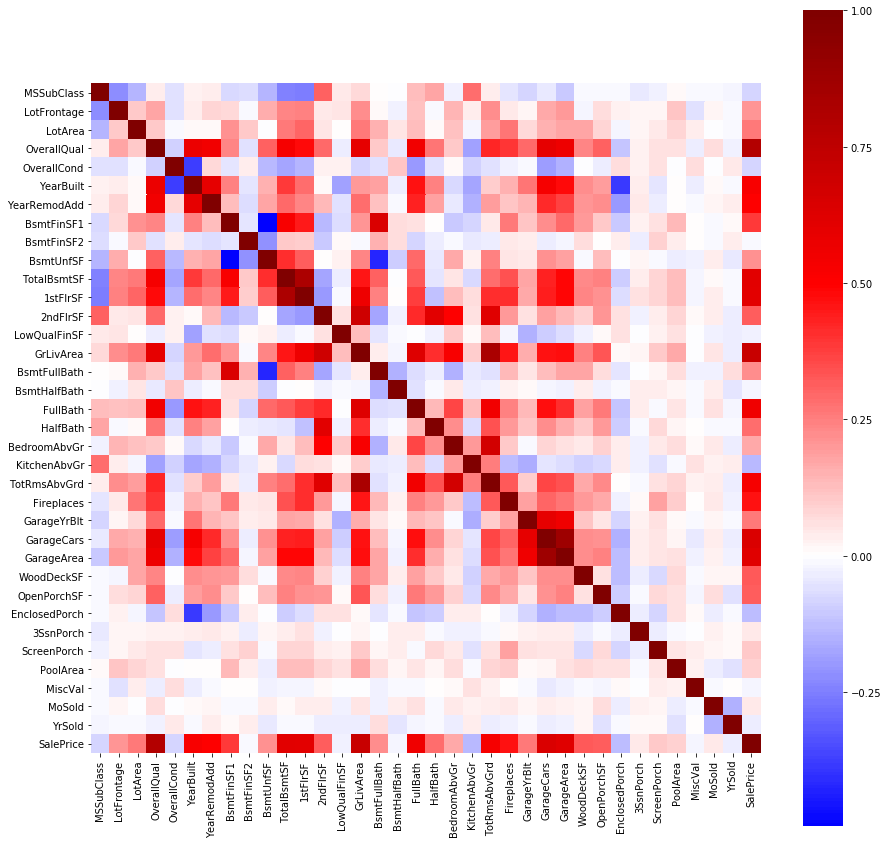

In [28]:
# heatmap of the Sale price, with the numerical columns
corr = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, square=True, ax=ax, cmap='seismic', center= 0.0)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);


* From the above figure, there are some features which have high corrolation with the "Sale price" column, most of them with positive corrolation.  

* It is interesting to find that OverallQual has high corrolation with the Sale price, on the otherhand Overallcond has a small corrolation factor with sale price.



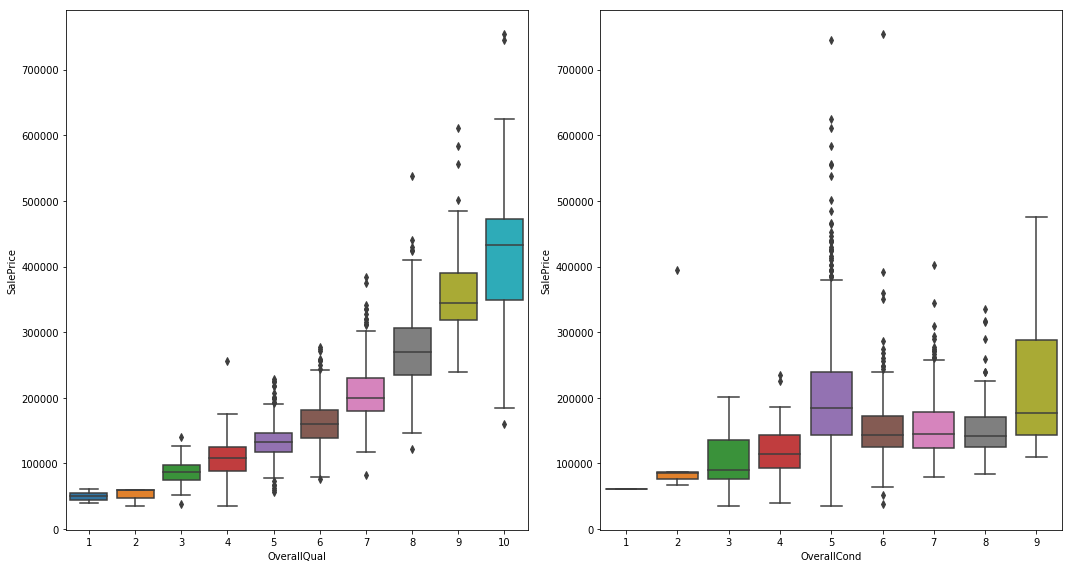

In [46]:
# Check OverallQual and OverallCond columns
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
g = sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=data, ax = ax)
plt.close(g.fig)
ax = fig.add_subplot(122)
g = sns.catplot(x="OverallCond", y="SalePrice", kind="box", data=data, ax = ax)
plt.close(g.fig)

plt.tight_layout()

* It make sense  now why OverallQual gives high corrolation with saleprice than OverallCond

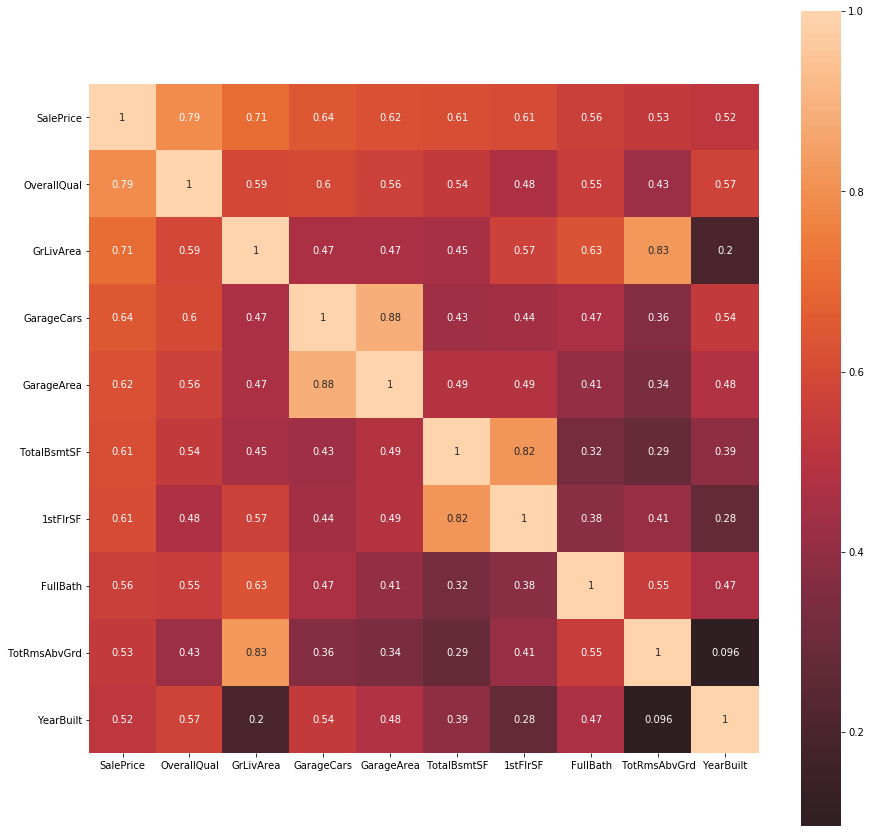

In [26]:
corr = data.corr()
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index   # Take the max 10 
corr = data[cols].corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, square=True, ax=ax, center= 0.0, xticklabels=cols, yticklabels=cols, annot=True)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);

* Numerical columns with high corrolation with Sale price are: 
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt' ]

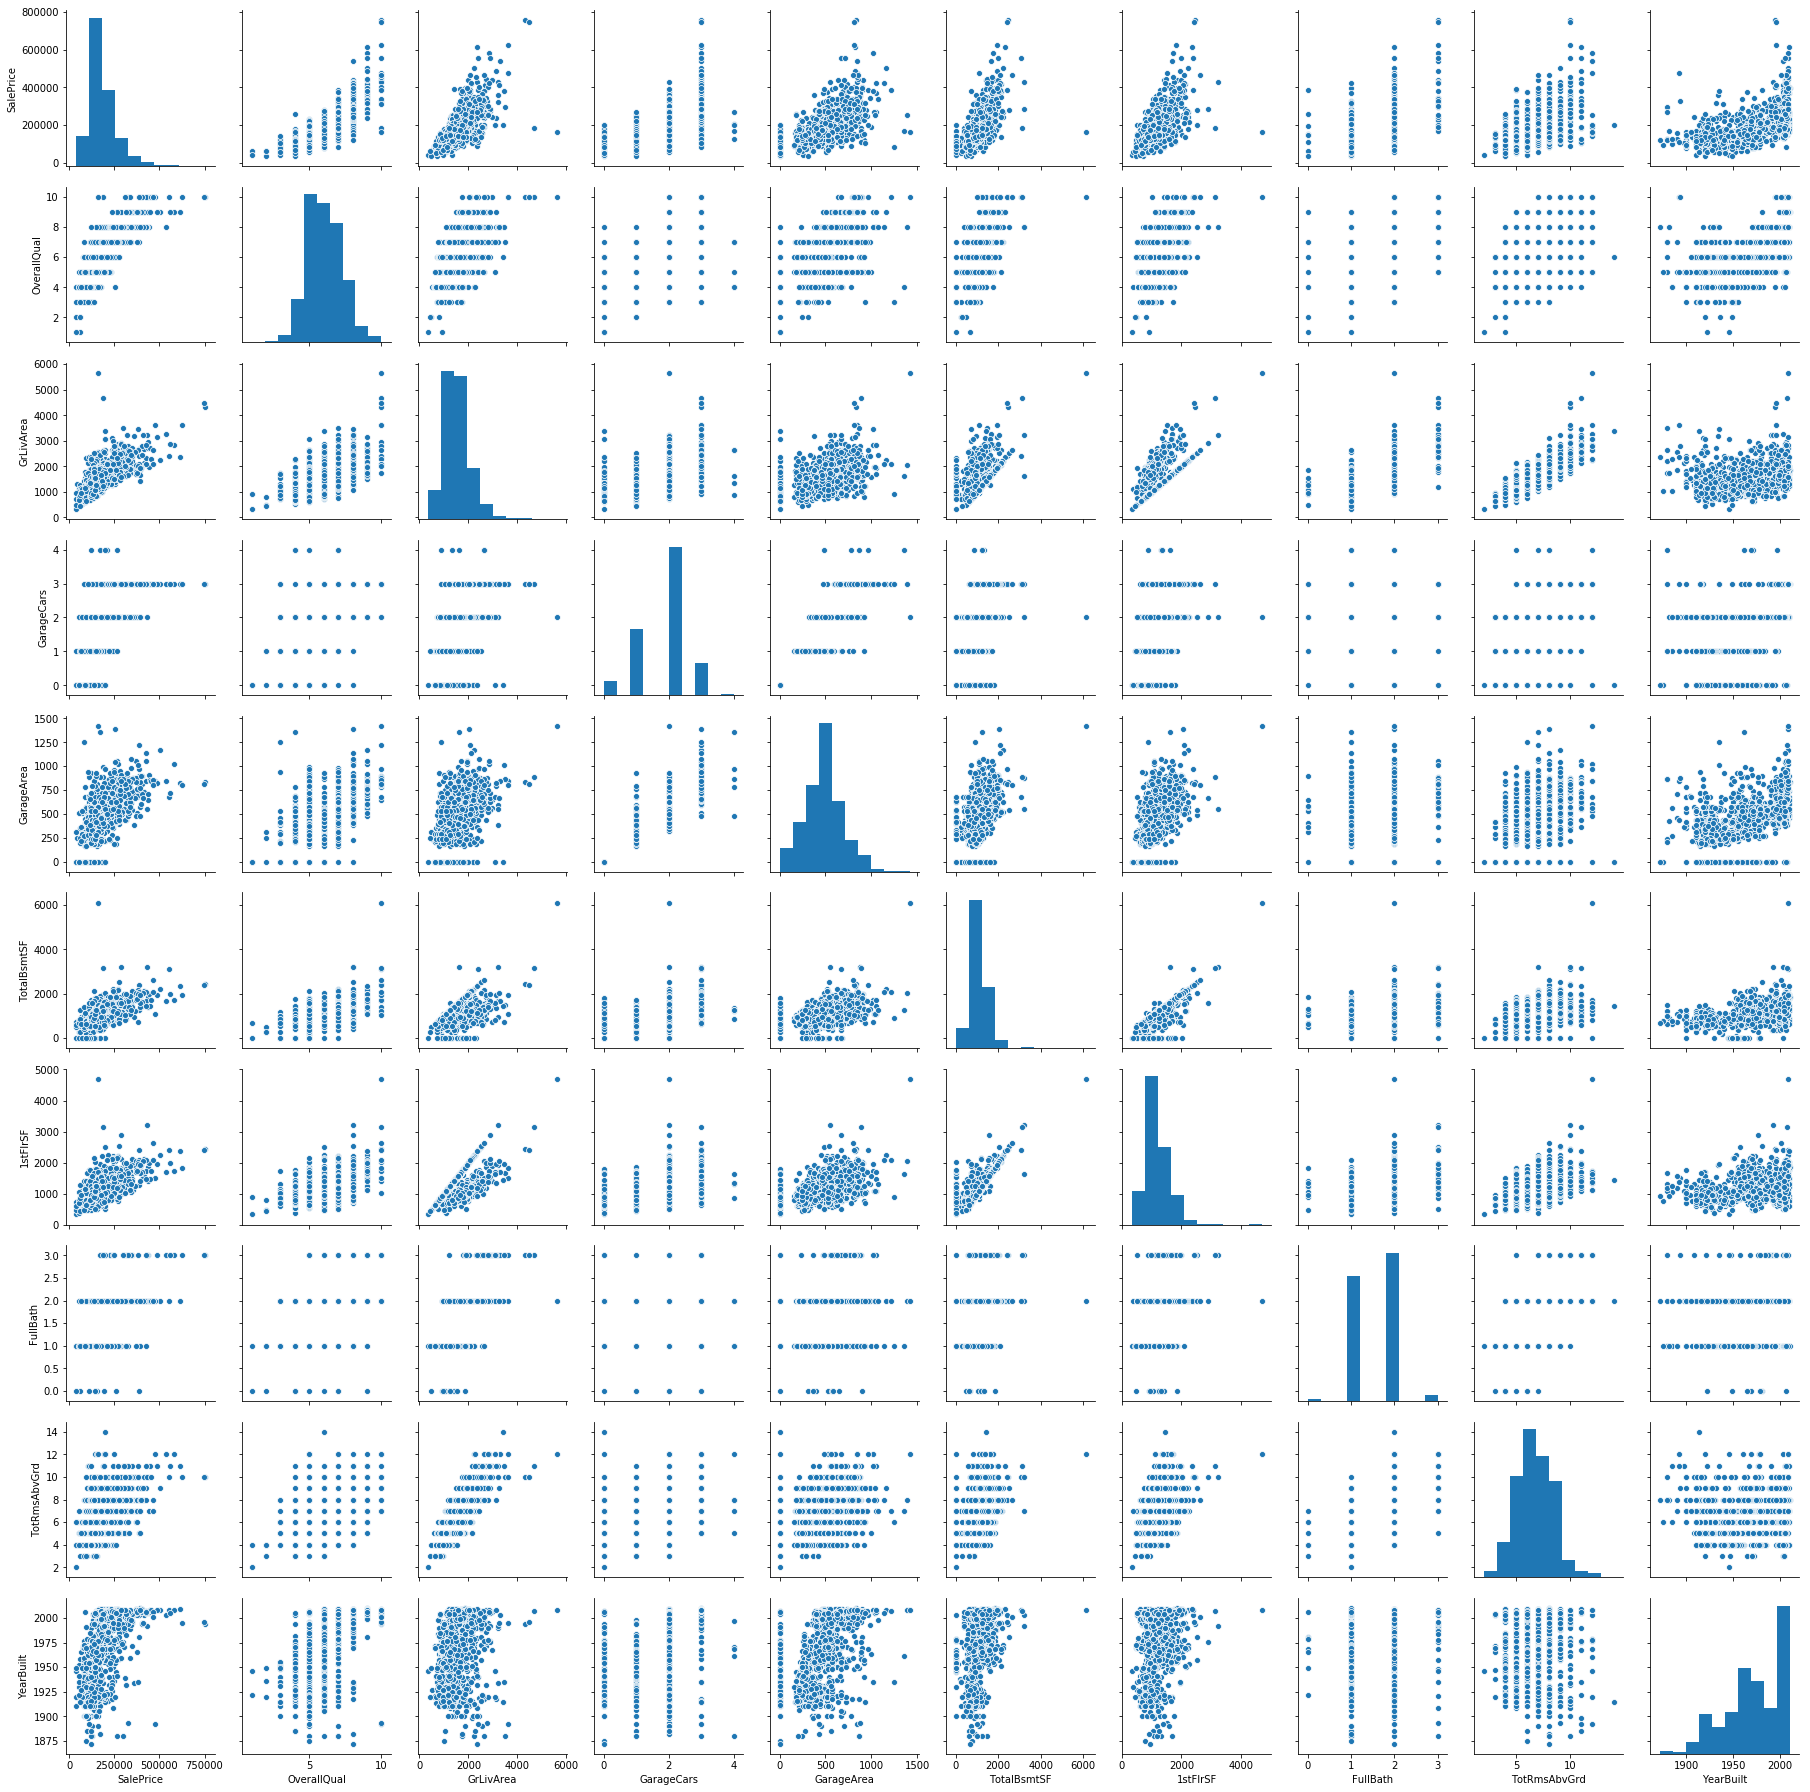

In [30]:
sns.pairplot(data[cols]);

The following columns are integer and they give different corrolation with sale price:
* GarageCars: Size of garage in car capacity, 
* FullBath: Full bathrooms above grade, and 
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  

## EDA for Categorical columns

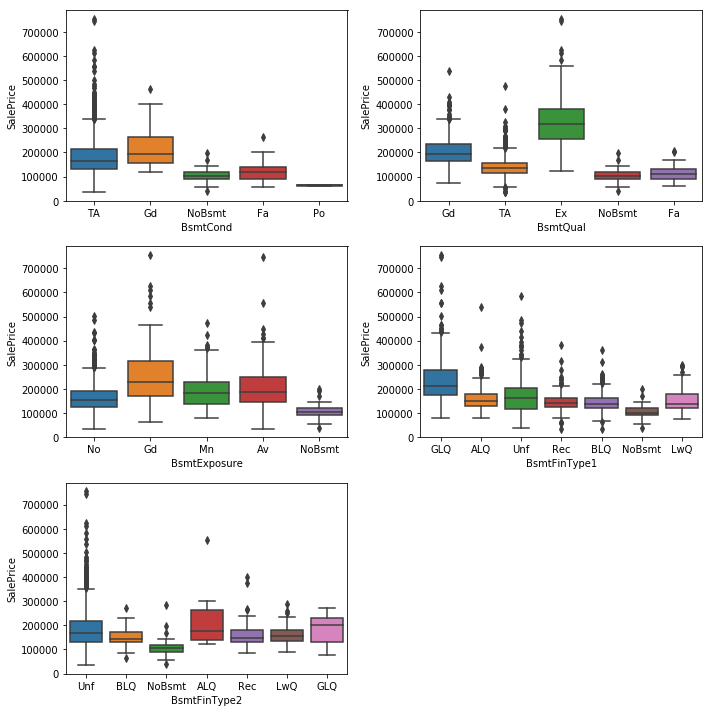

In [6]:
# Columns related to Basement
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(321)
g = sns.catplot(x="BsmtCond", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(322)
g = sns.catplot(x="BsmtQual", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(323)
g = sns.catplot(x="BsmtExposure", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(324)
g = sns.catplot(x="BsmtFinType1", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(325)
g = sns.catplot(x="BsmtFinType2", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
plt.tight_layout()

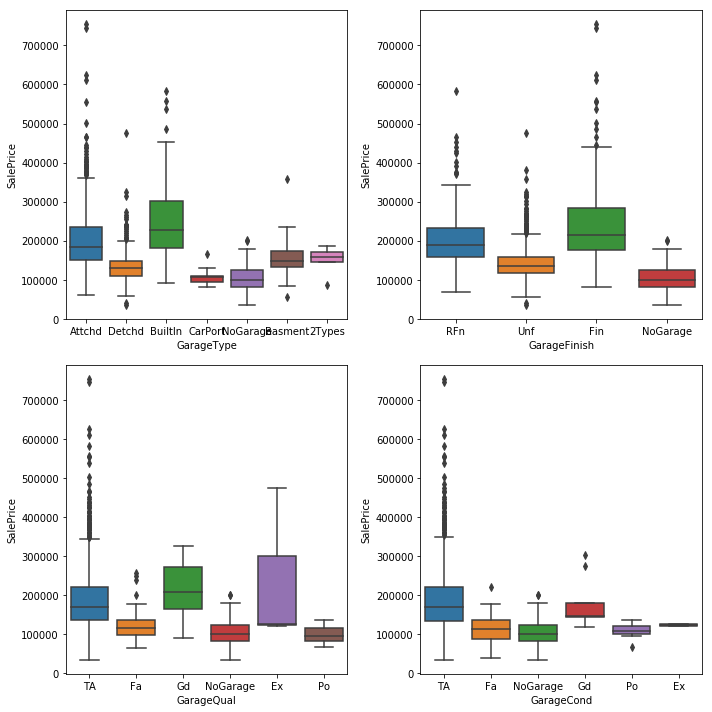

In [7]:
# Columns related to Garage
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
g = sns.catplot(x="GarageType", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(222)
g = sns.catplot(x="GarageFinish", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(223)
g = sns.catplot(x="GarageQual", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(224)
g = sns.catplot(x="GarageCond", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)

plt.tight_layout()

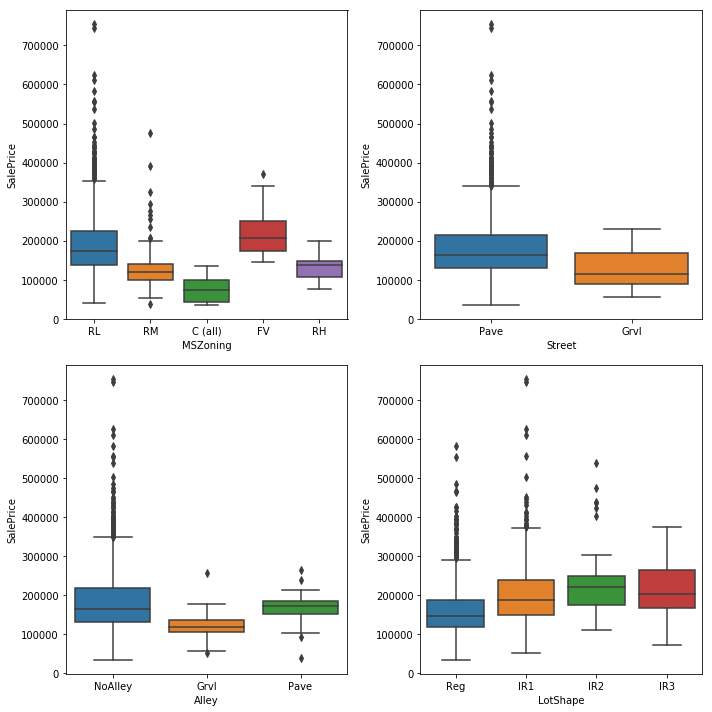

In [47]:
# Columns related to surrounding condition 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
g = sns.catplot(x="MSZoning", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(222)
g = sns.catplot(x="Street", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(223)
g = sns.catplot(x="Alley", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)
ax = fig.add_subplot(224)
g = sns.catplot(x="LotShape", y="SalePrice", kind="box", data=data, ax=ax)
plt.close(g.fig)

plt.tight_layout()

Some of the categorical variables can be used to predict the price, I will use feature selection techniques to select the best features. 

## Converting categorical columns 
* The data now is clean, the next step is to convert object columns to one-hot-code or encoding labels. 
* I will use One-hot-encoder for the following columns: 
    * MSZoning
    * Street
    * Alley
    * 
    
* I will use labelEncoder for the following columns: 
    * 

